In [ ]:
!pip install --user stg 
# If you are running this notebook on Google Colab, please reset the current python environment via 'Runtime -> Restart runtime' after installation.

In [1]:
from stg import STG
import numpy as np
import scipy.stats # for creating a simple dataset 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from dataset import create_twomoon_dataset
import torch


In [2]:
n_size = 1000 #Number of samples
p_size = 20   #Number of features
X_data, y_data=create_twomoon_dataset(n_size,p_size)
print(X_data.shape)
print(y_data.shape)

(1000,)
(1000, 20)
(1000, 20)
(1000,)


C:\Users\kyyan\AppData\Local\Temp\ipykernel_19324\4288925280.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[0].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
C:\Users\kyyan\AppData\Local\Temp\ipykernel_19324\4288925280.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[1].scatter(x=X_data[:,2], y=X_data[:,3], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)


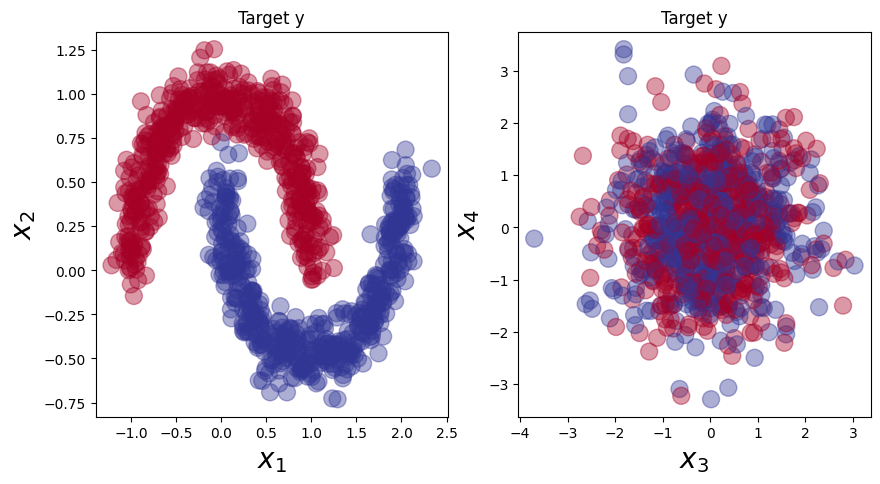

In [3]:
f,ax = plt.subplots(1,2,figsize=(10,5))
        

ax[0].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[0].set_title('Target y')
ax[1].scatter(x=X_data[:,2], y=X_data[:,3], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
ax[1].set_xlabel('$x_3$',fontsize=20)
ax[1].set_ylabel('$x_4$',fontsize=20)
ax[1].set_title('Target y')
plt.tick_params(labelsize=10)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)

In [5]:
args_cuda = torch.cuda.is_available()
device = torch.device("cuda" if args_cuda else "cpu") 
feature_selection = True
model = STG(task_type='classification',input_dim=X_train.shape[1], output_dim=2, hidden_dims=[60, 20], activation='tanh',
    optimizer='SGD', learning_rate=0.1, batch_size=X_train.shape[0], feature_selection=feature_selection, sigma=0.5, lam=0.5, random_state=1, device=device) 


In [6]:
model.fit(X_train, y_train, nr_epochs=6000, valid_X=X_valid, valid_y=y_valid, print_interval=1000)

C:\Users\kyyan\AppData\Roaming\Python\Python38\site-packages\stg\models.py:171: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  value = self.softmax(logits)


Epoch: 1000: loss=0.324974 valid_loss=0.292167
Epoch: 2000: loss=0.077912 valid_loss=0.012596
Epoch: 3000: loss=0.068842 valid_loss=0.006950
Epoch: 4000: loss=0.066330 valid_loss=0.005761
Epoch: 5000: loss=0.065104 valid_loss=0.005153
Epoch: 6000: loss=0.064500 valid_loss=0.004902


In [7]:
model.get_gates(mode='prob')

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [8]:
model.get_gates(mode='raw') 

array([ 1.9978058,  1.8850304, -1.6171505, -1.617892 , -1.6169299,
       -1.6172433, -1.616079 , -1.6145778, -1.6167123, -1.61517  ,
       -1.6171314, -1.607756 , -1.6104075, -1.6150019, -1.6165441,
       -1.6152136, -1.6122899, -1.6170533, -1.6176033, -1.6135565],
      dtype=float32)

## Testing the model

In [9]:
y_pred=model.predict(X_data)

In [10]:
y_pred[:10]

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [11]:
y_data[:10]

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

C:\Users\kyyan\AppData\Local\Temp\ipykernel_19324\621722293.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[0].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
C:\Users\kyyan\AppData\Local\Temp\ipykernel_19324\621722293.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax[1].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_pred.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)


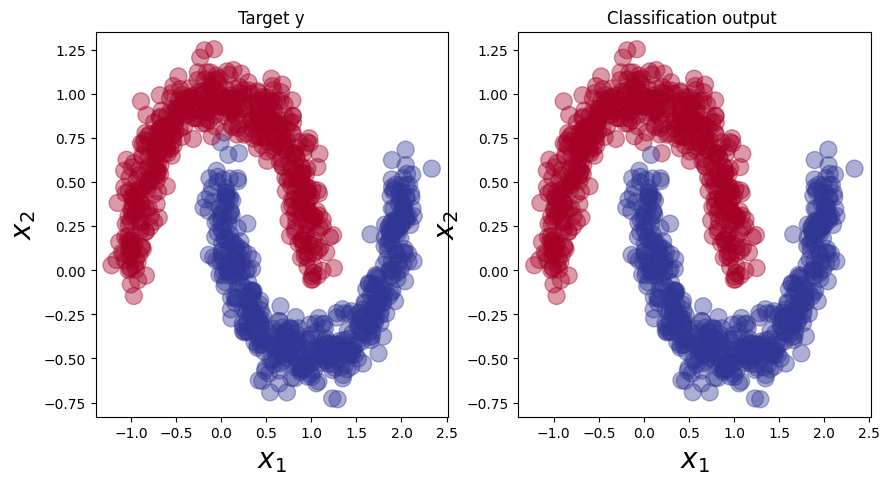

In [14]:
f,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[0].set_title('Target y')
ax[1].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_pred.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[1].set_title('Classification output ')
plt.tick_params(labelsize=10)

## Model saving / loading 

In [14]:
model.save_checkpoint('trained_model.pt')

In [15]:
model_tmp = STG(task_type='classification',input_dim=X_train.shape[1], output_dim=2, hidden_dims=[60, 20], activation='tanh',
    optimizer='SGD', learning_rate=0.1, batch_size=X_train.shape[0], feature_selection=feature_selection, sigma=0.5, lam=0.5, random_state=1, device=device) 

In [16]:
model_tmp.load_checkpoint('trained_model.pt')

Checkpoint loaded: trained_model.pt.
